# Capstone Project 1 - Data Story of Bike Rentals dataset for hourly demand.

### Questions asked :
1. What is the distribution of Bike rental count?
2. How does the demand vary for different weather factors like Temperature?
3. How does the demand vary for working day Vs weekend?
4. How does the demand vary for different seasons? which season has highest demand?
5. How does the demand vary for different weather conditions?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/hour.csv")
df.columns = ['Instant','Date','Season','Year','Month','Hour','Holiday','Weekday','Workingday','Weather_Condition','Normalized_Temperature','Normalized_Feels_Temperture','Humidity','Windspeed','Casual','Registered','Demand']
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] += pd.to_timedelta(df['Hour'], unit='h')
df.index = df['Date']
del df['Date']
sns.set_style("whitegrid")
del df['Instant']
#sns.set()

In [3]:
df.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Normalized_Temperature,Normalized_Feels_Temperture,Humidity,Windspeed,Casual,Registered,Demand
Date,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


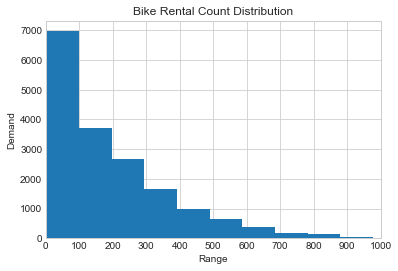

In [4]:
plt.hist(df["Demand"],bins=10)
plt.xlim([0,1000])
plt.xticks(np.arange(0, 1100, 100))
plt.title("Bike Rental Count Distribution")
plt.ylabel("Demand")
plt.xlabel("Range")
savefig('../../plot/img/demand_distribution.png', bbox_inches='tight')
plt.show()

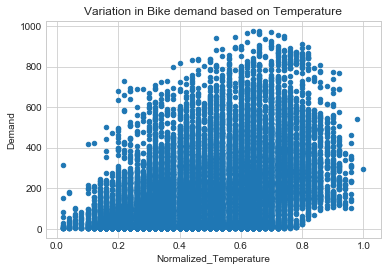

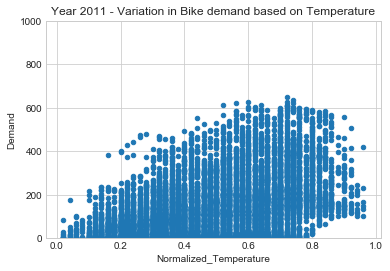

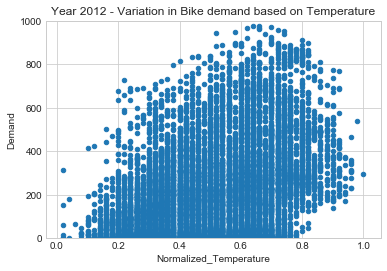

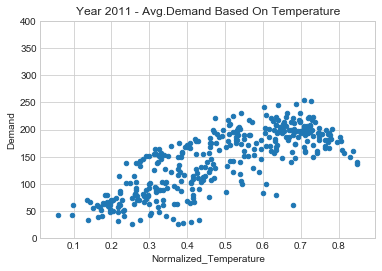

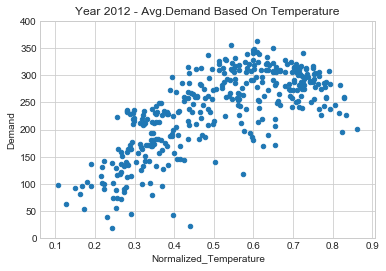

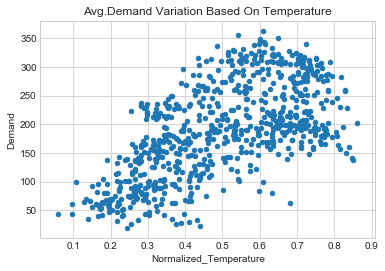

In [5]:
#Variation in Bike demand based on Temperature
df.plot(kind='scatter',x='Normalized_Temperature',y='Demand',title='Variation in Bike demand based on Temperature')
#Variation in demand based on temperature per Year
df[df['Year']==0].plot(kind='scatter',x='Normalized_Temperature',y='Demand',title='Year 2011 - Variation in Bike demand based on Temperature',ylim=[0,1000])
df[df['Year']==1].plot(kind='scatter',x='Normalized_Temperature',y='Demand',title='Year 2012 - Variation in Bike demand based on Temperature',ylim=[0,1000])

#Mean Variation in demand per day based on temperature through out per year
df[df['Year']==0].resample('D').mean().plot(kind='scatter',x='Normalized_Temperature',y='Demand',title='Year 2011 - Avg.Demand Based On Temperature',ylim=[0,400])
df[df['Year']==1].resample('D').mean().plot(kind='scatter',x='Normalized_Temperature',y='Demand',title='Year 2012 - Avg.Demand Based On Temperature',ylim=[0,400])

#Per day Mean variation in Bike demand based on Temperature
df.resample('D').mean().plot(kind='scatter',x='Normalized_Temperature',y='Demand', title='Avg.Demand Variation Based On Temperature')
savefig('../../plot/img/temp_demand.png', bbox_inches='tight')

plt.show()

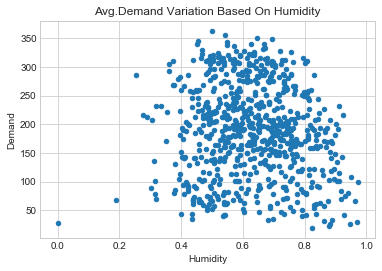

In [6]:
df.resample('D').mean().plot(kind='scatter',x='Humidity',y='Demand', title='Avg.Demand Variation Based On Humidity')
savefig('../../plot/img/humidity_demand.png', bbox_inches='tight')

plt.show()

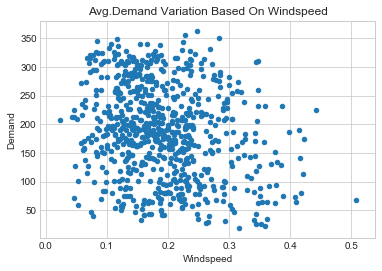

In [10]:
df.resample('D').mean().plot(kind='scatter',x='Windspeed',y='Demand', title='Avg.Demand Variation Based On Windspeed')
savefig('../../plot/img/windspeed_demand.png', bbox_inches='tight')

plt.show()

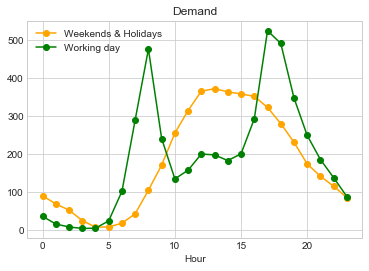

In [7]:
fig, ax = subplots()
df[(df["Workingday"]==0)].groupby(["Hour"])["Demand"].mean().plot(title='Demand',marker='o',legend=True, color='orange')
df[(df["Workingday"]==1)].groupby(["Hour"])["Demand"].mean().plot(title='Demand',marker='o',legend=True, color='green')

ax.legend(labels=["Weekends & Holidays","Working day"],loc=2);
savefig('../../plot/img/weekday_vs_weekend_demand.png', bbox_inches='tight')
plt.show()

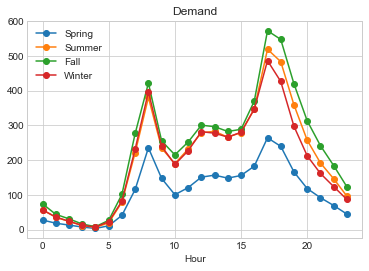

In [8]:
fig, ax = subplots()
df[(df["Season"]==1)].groupby(["Hour"])["Demand"].mean().plot(title="Demand",marker='o',legend=True,ax=ax)
df[(df["Season"]==2)].groupby(["Hour"])["Demand"].mean().plot(title="Demand",marker='o',legend=True,ax=ax)
df[(df["Season"]==3)].groupby(["Hour"])["Demand"].mean().plot(title="Demand",marker='o',legend=True,ax=ax)
df[(df["Season"]==4)].groupby(["Hour"])["Demand"].mean().plot(title="Demand",marker='o',legend=True,ax=ax)
ax.legend(labels=["Spring", "Summer","Fall","Winter"]);
savefig('../../plot/img/seasonal_demand.png', bbox_inches='tight')
plt.show()

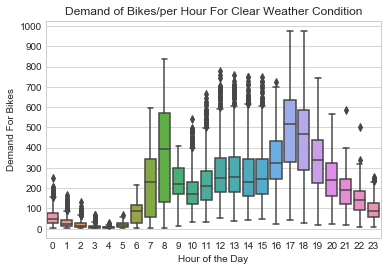

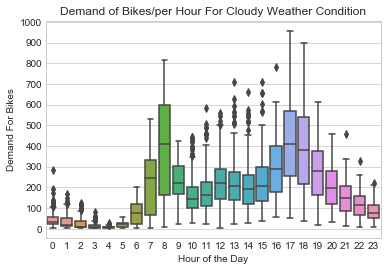

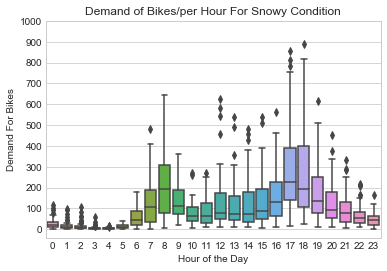

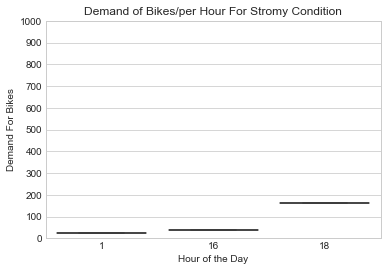

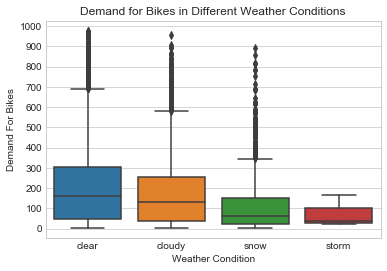

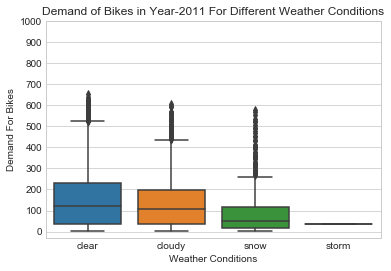

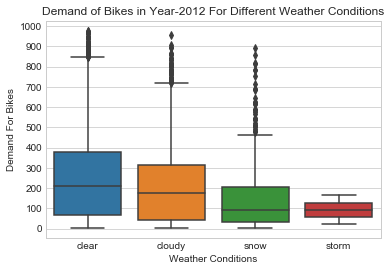

In [9]:
figure(1)
sns.boxplot(x='Hour',y='Demand',data=df[df['Weather_Condition']==1])
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Hour of the Day')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes/per Hour For Clear Weather Condition')
savefig('../../plot/img/clear_weather_condition_demand.png', bbox_inches='tight')
plt.show()

figure(2)
sns.boxplot(x='Hour',y='Demand',data=df[df['Weather_Condition']==2])
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Hour of the Day')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes/per Hour For Cloudy Weather Condition')
savefig('../../plot/img/cloudy_weather_condition_demand.png', bbox_inches='tight')
plt.show()

figure(3)
sns.boxplot(x='Hour',y='Demand',data=df[df['Weather_Condition']==3])
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Hour of the Day')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes/per Hour For Snowy Condition')
savefig('../../plot/img/snow_rain_weather_condition_demand.png', bbox_inches='tight')
plt.show()

figure(4)
sns.boxplot(x='Hour',y='Demand',data=df[df['Weather_Condition']==4])
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Hour of the Day')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes/per Hour For Stromy Condition')
savefig('../../plot/img/storm_weather_condition_demand.png', bbox_inches='tight')
plt.show()

figure(5)
sns.boxplot(x='Weather_Condition',y='Demand',data=df)
plt.xticks(np.arange(4),('clear','cloudy','snow','storm'))
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Weather Condition')
plt.ylabel('Demand For Bikes')
plt.title('Demand for Bikes in Different Weather Conditions')
savefig('../../plot/img/demand_weather_conditions.png', bbox_inches='tight')
plt.show()

figure(6)
sns.boxplot(x='Weather_Condition',y='Demand',data=df[df['Year']==0])
plt.xticks(np.arange(4),('clear','cloudy','snow','storm'))
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Weather Conditions')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes in Year-2011 For Different Weather Conditions')
savefig('../../plot/img/2011_demand_weather_conditions.png', bbox_inches='tight')
plt.show()

figure(7)
sns.boxplot(x='Weather_Condition',y='Demand',data=df[df['Year']==1])
plt.xticks(np.arange(4),('clear','cloudy','snow','storm'))
plt.yticks(np.arange(0, 1100, 100))
plt.xlabel('Weather Conditions')
plt.ylabel('Demand For Bikes')
plt.title('Demand of Bikes in Year-2012 For Different Weather Conditions')
savefig('../../plot/img/2012_demand_weather_conditions.png', bbox_inches='tight')
plt.show()

### Observations
1. Histogram reveals that large number of rented bike count fall under 0-100.
2. Scatter plot reveals that demand in bikes increases at higher demand.
3. Scatter plot also reveals that demand increased in 2012 compared to 2011.
4. Line plot reveals Weekdays have a higher demand during morning and evening hours, whereas Weekends have higher demand during middle hours of the day.
5. Line plot reveals that demand is highest in Fall season and lowest in Spring season.
6. Statistical Box plots reveal that demand is highest in clear conditions and lowest in stormy conditions. 